In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import apyori

In [22]:
path = r'C:\Users\Felipe\Desktop\apriori-projeto\datasets\market basket optimisation.csv'
data = pd.read_csv(path)

In [23]:
print(data.iloc[:5, :5])

           shrimp    almonds     avocado    vegetables mix green grapes
0         burgers  meatballs        eggs               NaN          NaN
1         chutney        NaN         NaN               NaN          NaN
2          turkey    avocado         NaN               NaN          NaN
3   mineral water       milk  energy bar  whole wheat rice    green tea
4  low fat yogurt        NaN         NaN               NaN          NaN


In [26]:
# Remove leading and trailing spaces from string columns
for col in data.columns:
    if data[col].dtype == "object":
        data[col] = data[col].str.strip()

In [31]:
# Transform the DataFrame from wide format (multiple columns per transaction)
# to long format, where all items are in a single column named 'value'
# Example: from a table with columns like item1, item2, ..., to one column containing all items
market_itens = data.melt()['value']  # selects only the 'value' column which holds product names

# Remove missing values (NaN) from the list of items
market_itens = market_itens.dropna()

# Sort the items alphabetically
market_itens = market_itens.sort_values()

# Print the number of unique items in the dataset
print(f'There are {len(market_itens.unique())} unique items in the dataset.')


There are 119 unique items in the dataset.


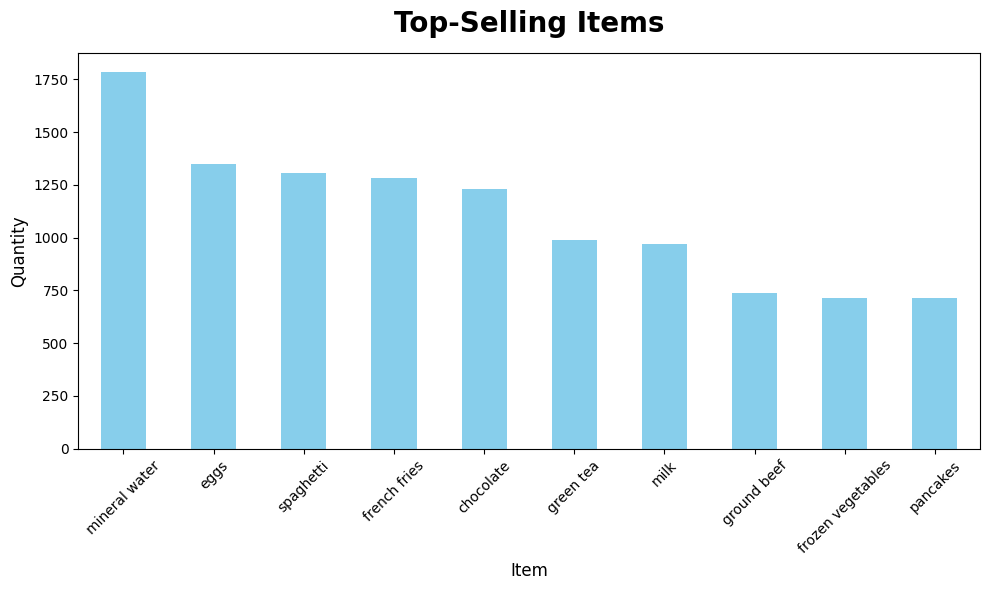

In [33]:
# Count how many times each item appears and get the 10 most frequent ones
top_10_items = market_itens.value_counts().head(10)

# Create the bar plot
fig, ax = plt.subplots(figsize=(10, 6))
top_10_items.plot.bar(ax=ax, color='skyblue')

# Customize the chart
ax.set_title("Top-Selling Items", fontsize=20, weight='bold', pad=15)
ax.set_ylabel("Quantity", fontsize=12)
ax.set_xlabel("Item", fontsize=12)
plt.xticks(rotation=45)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

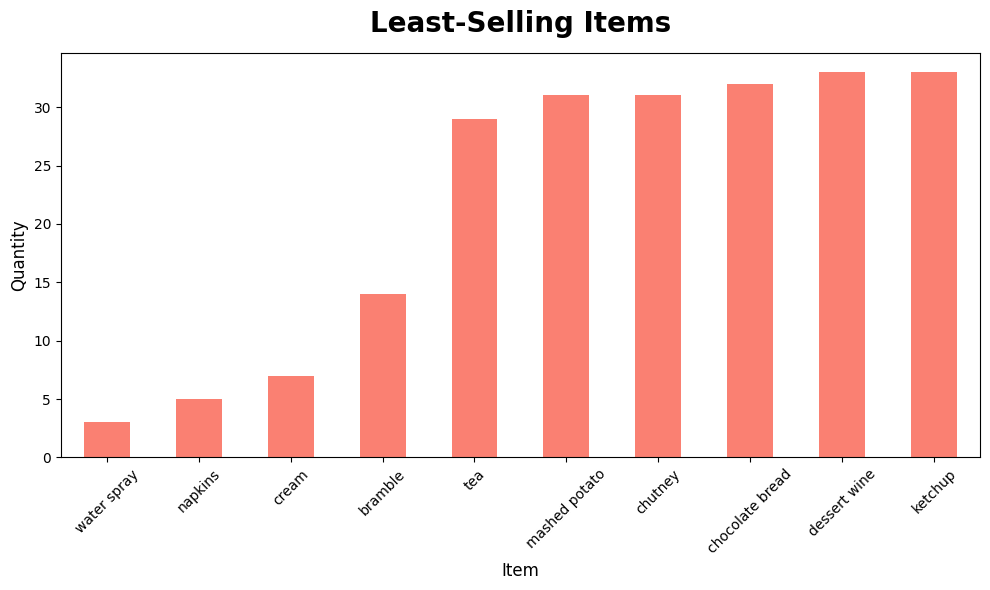

In [34]:
# Get the 10 least sold items
bottom_10_items = market_itens.value_counts().nsmallest(10)

# Create the bar plot
fig, ax = plt.subplots(figsize=(10, 6))
bottom_10_items.plot.bar(ax=ax, color='salmon')

# Customize the chart
ax.set_title("Least-Selling Items", fontsize=20, weight='bold', pad=15)
ax.set_ylabel("Quantity", fontsize=12)
ax.set_xlabel("Item", fontsize=12)
plt.xticks(rotation=45)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

In [38]:
# For each row (transaction) in the dataset,
# count how many non-null (non-missing) values there are.
# Each non-null value represents an item that was purchased in that basket.
items_per_basket = data.notna().sum(axis=1)

# Display the resulting Series, which shows the number of items per basket (transaction)
items_per_basket


0       3
1       1
2       2
3       5
4       1
       ..
7495    3
7496    6
7497    1
7498    2
7499    4
Length: 7500, dtype: int64

In [39]:
# Select only the transactions (rows) that have more than one item purchased
# For each of these transactions, drop the missing values (NaN) and convert the items into a set
# This creates a list of sets, where each set represents the unique items bought in one basket
baskets = [set(row.dropna()) for _, row in data[items_per_basket > 1].iterrows()]

# Show the first 5 baskets to inspect
baskets[:5]

[{'burgers', 'eggs', 'meatballs'},
 {'avocado', 'turkey'},
 {'energy bar', 'green tea', 'milk', 'mineral water', 'whole wheat rice'},
 {'french fries', 'whole wheat pasta'},
 {'light cream', 'shallot', 'soup'}]

In [40]:
len(baskets)

5746

In [54]:
# Set the minimum support threshold (e.g., 4% of transactions)
minsup = 0.04

# Set the minimum confidence threshold (e.g., 30%)
minconf = 0.3

# Run the Apriori algorithm on the list of baskets (transactions),
# using the specified minimum support and confidence thresholds
association_rules = apyori.apriori(baskets, min_support=minsup, min_confidence=minconf)

# Iterate over the generated association rules
for rule in association_rules:
    # Convert the items in the rule to a list for easier display
    items = list(rule.items)
    
    # Print the rule in the format:
    # [all items except last] --> [last item]  Support: X.XXX  Confidence: Y.YYY
    print(
        f"{items[:-1]} --> [{items[-1]}]  Support: {rule.support:.3f}"
        f"  Confidence: {rule.ordered_statistics[0].confidence:.3f}"
    )


['mineral water'] --> [chocolate]  Support: 0.069  Confidence: 0.342
['mineral water'] --> [eggs]  Support: 0.066  Confidence: 0.304
['frozen vegetables'] --> [mineral water]  Support: 0.047  Confidence: 0.385
['ground beef'] --> [mineral water]  Support: 0.053  Confidence: 0.429
['ground beef'] --> [spaghetti]  Support: 0.051  Confidence: 0.411
['mineral water'] --> [milk]  Support: 0.063  Confidence: 0.383
['mineral water'] --> [pancakes]  Support: 0.044  Confidence: 0.375
['mineral water'] --> [spaghetti]  Support: 0.078  Confidence: 0.357


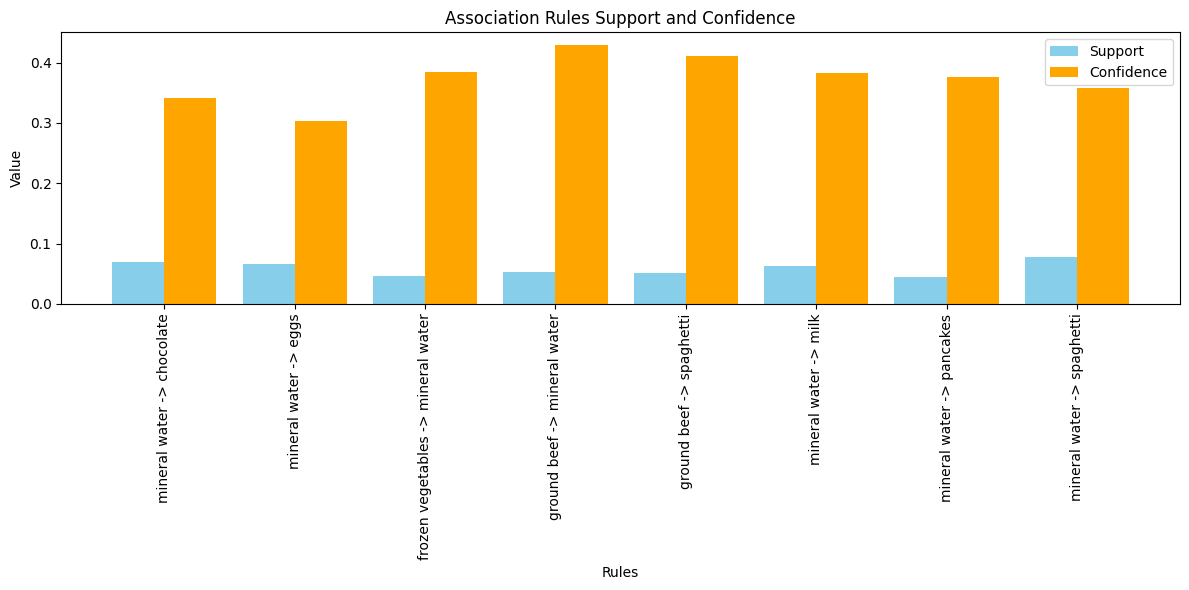

In [55]:
# Convert the generator to a list so we can reuse the results
association_rules = list(apyori.apriori(baskets, min_support=minsup, min_confidence=minconf))

# Extract rule labels, supports, and confidences
rules_labels = []
supports = []
confidences = []

for rule in association_rules:
    items = list(rule.items)
    antecedent = ", ".join(map(str, items[:-1]))
    consequent = str(items[-1])
    label = f"{antecedent} -> {consequent}"
    
    rules_labels.append(label)
    supports.append(rule.support)
    confidences.append(rule.ordered_statistics[0].confidence)

# Set figure size
plt.figure(figsize=(12, 6))

# Bar width
bar_width = 0.4

# X positions for the bars
x = range(len(rules_labels))

# Plot support bars (blue)
plt.bar(x, supports, width=bar_width, label='Support', color='skyblue')

# Plot confidence bars (orange), shifted right to avoid overlap
plt.bar([i + bar_width for i in x], confidences, width=bar_width, label='Confidence', color='orange')

# Set x-ticks in the middle of the two bars, rotate labels for readability
plt.xticks([i + bar_width / 2 for i in x], rules_labels, rotation=90)

# Add titles and legend
plt.title('Association Rules Support and Confidence')
plt.ylabel('Value')
plt.xlabel('Rules')
plt.legend()

# Adjust layout to prevent clipping
plt.tight_layout()

# Show the plot
plt.show()

### Interpretation of Apriori Results

The Apriori algorithm identifies frequent itemsets and generates association rules that reveal relationships between products purchased together in transactions. Each rule is characterized by two key metrics: **support** and **confidence**.

* **Support** measures how frequently the entire itemset (both antecedent and consequent) appears in the dataset. A higher support value means the rule is applicable to a larger portion of all transactions.
* **Confidence** measures the reliability of the inference made by the rule. It represents the probability that the consequent item(s) are purchased when the antecedent item(s) are bought. Higher confidence indicates a stronger association.

In the visualization, each rule is displayed with two bars representing its support and confidence values. This allows for quick comparison between how often the rule applies and how strong the predictive relationship is.

When interpreting these results:

* Rules with both high support and high confidence are generally the most valuable, as they represent common and reliable purchasing patterns.
* Rules with lower support but high confidence may indicate niche but strong associations.
* Conversely, high support but low confidence suggests items that often appear together but with weak predictive power.

By analyzing these metrics, businesses can make informed decisions about product placement, cross-selling strategies, and targeted promotions to increase sales and customer satisfaction.
